# Capstone Project Module 2
This notebook will analyze data from the Northwind Database focusing on 'Products'. Northwind database is a database that describes about selling food products, along with their employee, customer, order data, and product suppliers. 

The tables in this database are:
- Employees 
- EmployeeTerritories
- Territories
- Region
- Orders
- Shippers
- OrderDetails
- Customers
- CustomersCustomerDemo
- CustomerDemographics
- Products
- Suppliers
- Categories

### Connecting to Northwind Database

In [37]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="alaniah98",
  database ="northwindpro"
)

In [39]:
mycursor = mydb.cursor() #access to database

def sql_con(myQuery):
    mycursor.execute(myQuery)
    myresult = mycursor.fetchall()
    dataC = pd.DataFrame(myresult, columns = mycursor.column_names)
    return dataC

In [40]:
sql_con('''
    SELECT * FROM Orders;
''') #try if database is connecting properly

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.3800,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.6100,Toms Spezialitten,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.8300,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.3400,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3000,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaT,2,24.9500,Pericles Comidas clsicas,Calle Dr. Jorge Cash 321,Mxico D.F.,None,5033,Mexico
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaT,2,18.4400,Simons bistro,Vinbltet 34,Kobenhavn,None,1734,Denmark
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,2,6.1900,Richter Supermarkt,Starenweg 5,Genve,None,1204,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,2,38.2800,Bon app-,"12, rue des Bouchers",Marseille,None,13008,France


### Selecting required tables for analysis (Products focused analysis)

As the analysis focus is on the products itself, all of the orders are assumed to have arrived to the customers without problems. Therefore, the chosen columns for this project's analysis are: 

- All columns from Products table
- OrderDate from Orders table
- CustomerID, ContactName, City, Country from Customers Table 
- All columns from Categories table 

In [41]:
custTab = sql_con('''
    SELECT a.*, b.Quantity, c.orderDate, d.CustomerID, d.ContactName, d.City, d.Country, e.CategoryName, e.Description
    FROM Products a
    LEFT JOIN OrderDetails b
    on a.ProductID=b.ProductID
    LEFT JOIN Orders c
    on b.OrderID=c.OrderID
    LEFT JOIN Customers d
    on c.CustomerID=d.CustomerID
    LEFT JOIN Categories e
    on a.CategoryID=e.CategoryID;
''')
custTab.head()

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Quantity,orderDate,CustomerID,ContactName,City,Country,CategoryName,Description
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0,45,1996-08-20,QUICK,Horst Kloss,Cunewalde,Germany,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0,18,1996-08-30,RATTC,Paula Wilson,Albuquerque,USA,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0,20,1996-09-30,LONEP,Fran Wilson,Portland,USA,Beverages,"Soft drinks, coffees, teas, beers, and ales"
3,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0,15,1996-11-07,WANDK,Rita Mller,Stuttgart,Germany,Beverages,"Soft drinks, coffees, teas, beers, and ales"
4,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0,12,1996-11-14,PERIC,Guillermo Fernndez,Mxico D.F.,Mexico,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [42]:
custTab.info() #checking data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProductID        2155 non-null   int64         
 1   ProductName      2155 non-null   object        
 2   SupplierID       2155 non-null   int64         
 3   CategoryID       2155 non-null   int64         
 4   QuantityPerUnit  2155 non-null   object        
 5   UnitPrice        2155 non-null   object        
 6   UnitsInStock     2155 non-null   int64         
 7   UnitsOnOrder     2155 non-null   int64         
 8   ReorderLevel     2155 non-null   int64         
 9   Discontinued     2155 non-null   int64         
 10  Quantity         2155 non-null   int64         
 11  orderDate        2155 non-null   datetime64[ns]
 12  CustomerID       2155 non-null   object        
 13  ContactName      2155 non-null   object        
 14  City             2155 non-null   object 

In [43]:
custTab.isnull().sum() #checking null value counts of each column

ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
Quantity           0
orderDate          0
CustomerID         0
ContactName        0
City               0
Country            0
CategoryName       0
Description        0
dtype: int64

### Data Cleaning Process: Solving missing values, handling anomalies, rechecking correct data types. 

Including checking general info on cleaned data, data description, and checking outlier. 

In [44]:
#unit price is filled with numerical values, but is an object data type
#change unitprice into float64
custTab['UnitPrice'] = pd.to_numeric(custTab['UnitPrice'],errors = 'coerce')

In [45]:
#check if data type is changed
custTab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ProductID        2155 non-null   int64         
 1   ProductName      2155 non-null   object        
 2   SupplierID       2155 non-null   int64         
 3   CategoryID       2155 non-null   int64         
 4   QuantityPerUnit  2155 non-null   object        
 5   UnitPrice        2155 non-null   float64       
 6   UnitsInStock     2155 non-null   int64         
 7   UnitsOnOrder     2155 non-null   int64         
 8   ReorderLevel     2155 non-null   int64         
 9   Discontinued     2155 non-null   int64         
 10  Quantity         2155 non-null   int64         
 11  orderDate        2155 non-null   datetime64[ns]
 12  CustomerID       2155 non-null   object        
 13  ContactName      2155 non-null   object        
 14  City             2155 non-null   object 

In [46]:
#get category values for later statistic analysis
custTab['CategoryName'].unique()

array(['Beverages', 'Condiments', 'Produce', 'Meat/Poultry', 'Seafood',
       'Dairy Products', 'Confections', 'Grains/Cereals'], dtype=object)

In [47]:
#check data duplicates

custTab[custTab.duplicated()]

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Quantity,orderDate,CustomerID,ContactName,City,Country,CategoryName,Description


<AxesSubplot:>

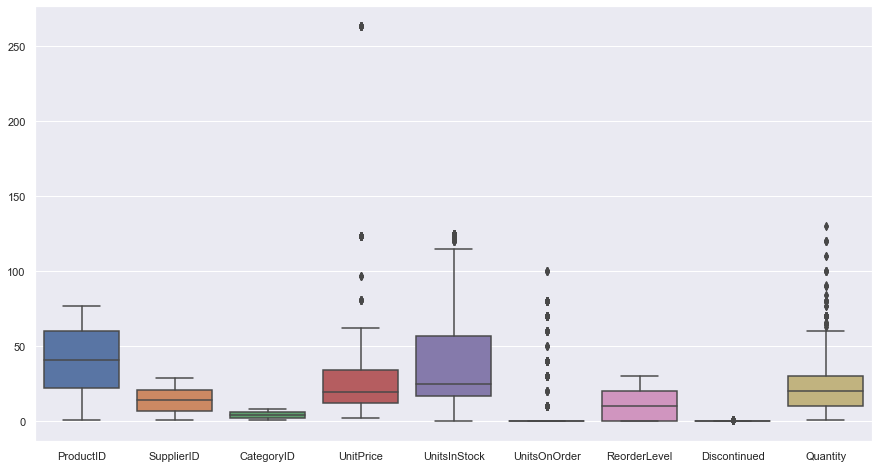

In [48]:
#check outliers with box plot
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=custTab)

Get General Info on Cleaned Data 

In [49]:
listItem = []
for col in custTab.columns :
    listItem.append([col, custTab[col].dtype, len(custTab),custTab[col].isna().sum(), round((custTab[col].isna().sum()/len(custTab[col])) * 100,2),
                    custTab[col].nunique(), list(custTab[col].drop_duplicates().sample(2).values)])

custTabDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
custTabDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ProductID,int64,2155,0,0.0,77,"[30, 41]"
1,ProductName,object,2155,0,0.0,77,"[Mozzarella di Giovanni, Gudbrandsdalsost]"
2,SupplierID,int64,2155,0,0.0,29,"[7, 8]"
3,CategoryID,int64,2155,0,0.0,8,"[6, 4]"
4,QuantityPerUnit,object,2155,0,0.0,70,"[25 - 825 g cans, 12 - 100 g bars]"
5,UnitPrice,float64,2155,0,0.0,62,"[6.0, 21.0]"
6,UnitsInStock,int64,2155,0,0.0,51,"[11, 76]"
7,UnitsOnOrder,int64,2155,0,0.0,10,"[20, 10]"
8,ReorderLevel,int64,2155,0,0.0,7,"[25, 5]"
9,Discontinued,int64,2155,0,0.0,2,"[1, 0]"


In [50]:
custTab.describe()

,ProductID,SupplierID,CategoryID,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Quantity
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,14.488167,4.135499,27.948687,39.795824,8.074246,11.900232,0.105800,23.812993
std,22.159019,8.228640,2.378567,31.610706,36.055668,19.748983,10.791421,0.307653,19.022047
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,7.000000,2.000000,12.500000,17.000000,0.000000,0.000000,0.000000,10.000000
50%,41.000000,14.000000,4.000000,19.450000,25.000000,0.000000,10.000000,0.000000,20.000000
75%,60.000000,21.000000,6.000000,34.000000,57.000000,0.000000,20.000000,0.000000,30.000000
max,77.000000,29.000000,8.000000,263.500000,125.000000,100.000000,30.000000,1.000000,130.000000


### Data Visualization
Describing important aspects of the data by visualization means. Questions that are solved by these visualizations are:

1.	What country does most customer come from? From that country, which city?
2.	What kind of products is frequently bought from the region from num 1? 
3.	Are there any loyal customers?
4.	What is the most bought product out of all products?
5.	How frequent is the top selling product bought over the years?


**Countries that has the most customers coming from**

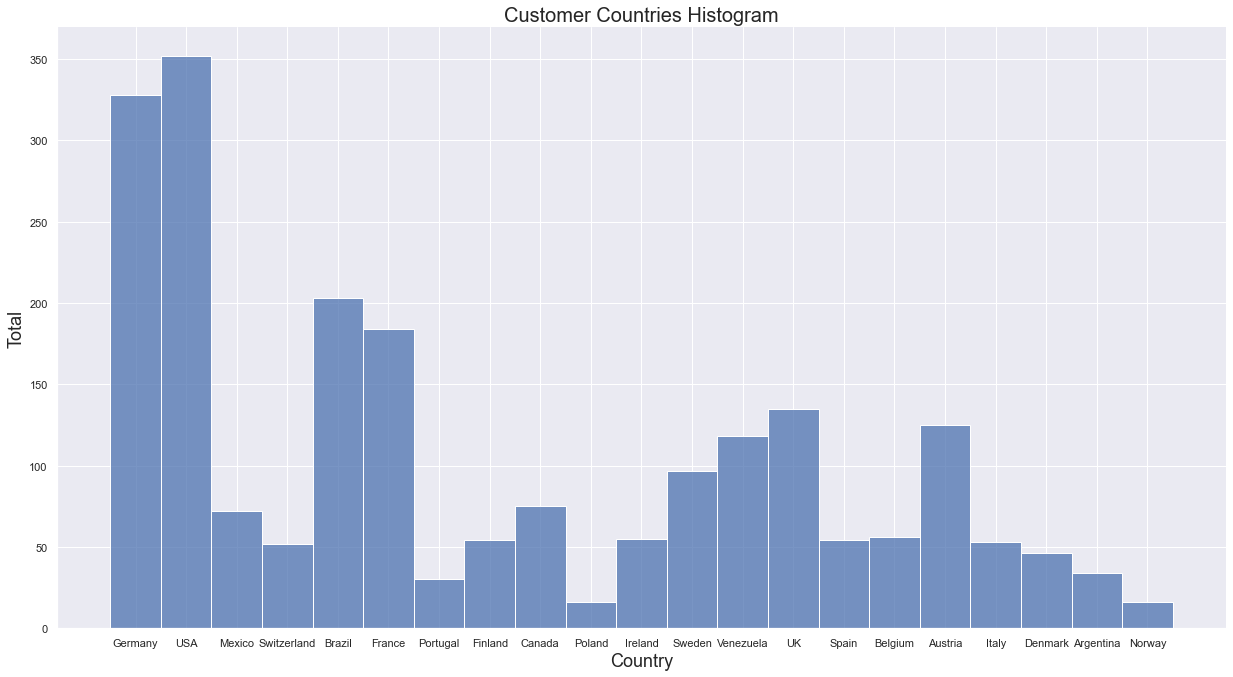

In [51]:
cHist = sns.displot(custTab['Country'])
cHist.fig.set_size_inches(20,10)
plt.title('Customer Countries Histogram', size = 20)
plt.xlabel('Country', size = 18)
plt.ylabel('Total', size = 18)
plt.show()

**Frequently bought products from the previous country**

In [52]:
prodsFromUSA = custTab.loc[custTab['Country'] == 'USA', 'ProductName']

countProd = prodsFromUSA.value_counts()
topProd = countProd.to_frame()
topProd.reset_index(inplace=True)
topProd = topProd.rename(columns = {'index':'product_name', 'ProductName':'total_counts'})
topProd

,product_name,total_counts
0,Gnocchi di nonna Alice,17
1,Tarte au sucre,15
2,Alice Mutton,11
3,Pavlova,10
4,Rhnbru Klosterbier,9
...,...,...
69,Gravad lax,1
70,Grandma's Boysenberry Spread,1
71,Ravioli Angelo,1
72,Gustaf's Knckebrd,1


Text(0, 0.5, 'Frequency Count')

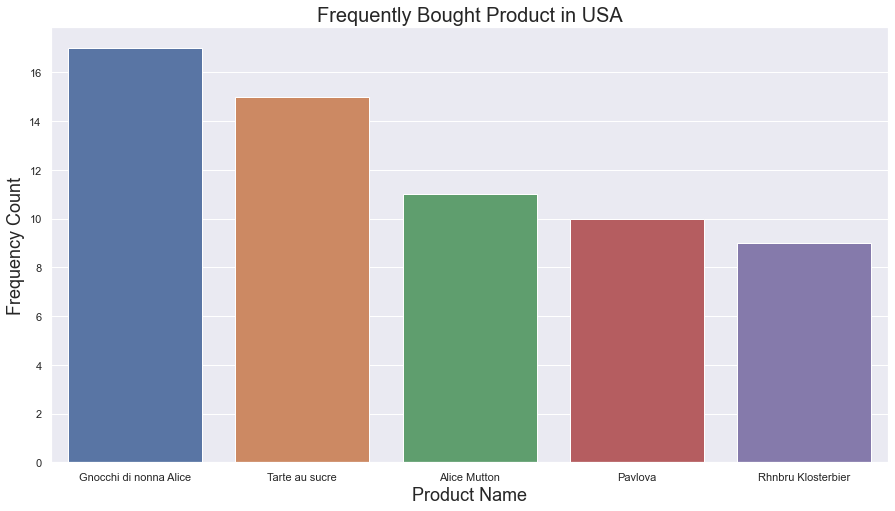

In [53]:
sns.barplot(x='product_name', y='total_counts', data=topProd.head())
plt.title('Frequently Bought Product in USA', size = 20)
plt.xlabel('Product Name', size = 18)
plt.ylabel('Frequency Count', size = 18)

**Loyal customers**

In [54]:
custTab['ContactName'].value_counts().head()

Jose Pavarotti      116
Roland Mendel       102
Horst Kloss          86
Paula Wilson         71
Patricia McKenna     55
Name: ContactName, dtype: int64

**Most bought products from total of all products**

In [55]:
sellProd = custTab['ProductName'].value_counts()
sellProd #Raclette Courdavault

Raclette Courdavault         54
Camembert Pierrot            51
Gorgonzola Telino            51
Guaran Fantstica             51
Gnocchi di nonna Alice       50
                             ..
Louisiana Hot Spiced Okra     8
Chocolade                     6
Genen Shouyu                  6
Gravad lax                    6
Mishi Kobe Niku               5
Name: ProductName, Length: 77, dtype: int64

**Top selling product frequency over the years**

In [56]:
racProd = custTab.loc[custTab['ProductName'] == 'Raclette Courdavault', 'orderDate']

newProd = pd.DataFrame()
newProd['Date'] = racProd
newProd['ProdQuantity'] = custTab.loc[custTab['ProductName'] == 'Raclette Courdavault', 'Quantity']
newProd

,Date,ProdQuantity
1547,1996-07-12,30
1548,1996-07-29,70
1549,1996-08-07,6
1550,1996-08-12,15
1551,1996-09-05,30
1552,1996-09-12,10
1553,1996-10-08,40
1554,1996-10-14,9
1555,1996-10-29,9
1556,1996-12-18,12


<AxesSubplot:xlabel='Date', ylabel='ProdQuantity'>

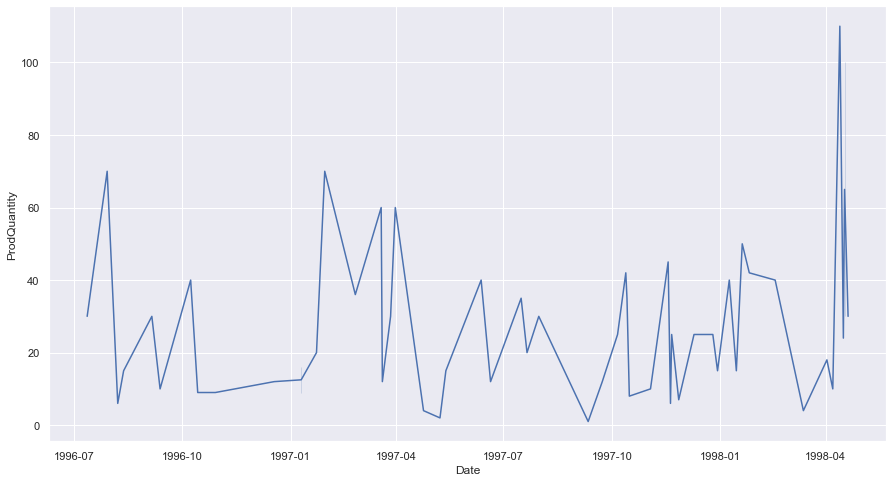

In [57]:
sns.lineplot(data=newProd, x="Date", y="ProdQuantity")

### Statistics
Analyzing data through statistic means. 

This section will discuss the correlations between the focus analysis variable with other variables, and solve any hypothesis that will be applied to the data.

**Normality test**

array([[<AxesSubplot:title={'center':'ProductID'}>,
        <AxesSubplot:title={'center':'SupplierID'}>,
        <AxesSubplot:title={'center':'CategoryID'}>],
       [<AxesSubplot:title={'center':'UnitPrice'}>,
        <AxesSubplot:title={'center':'UnitsInStock'}>,
        <AxesSubplot:title={'center':'UnitsOnOrder'}>],
       [<AxesSubplot:title={'center':'ReorderLevel'}>,
        <AxesSubplot:title={'center':'Discontinued'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'orderDate'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

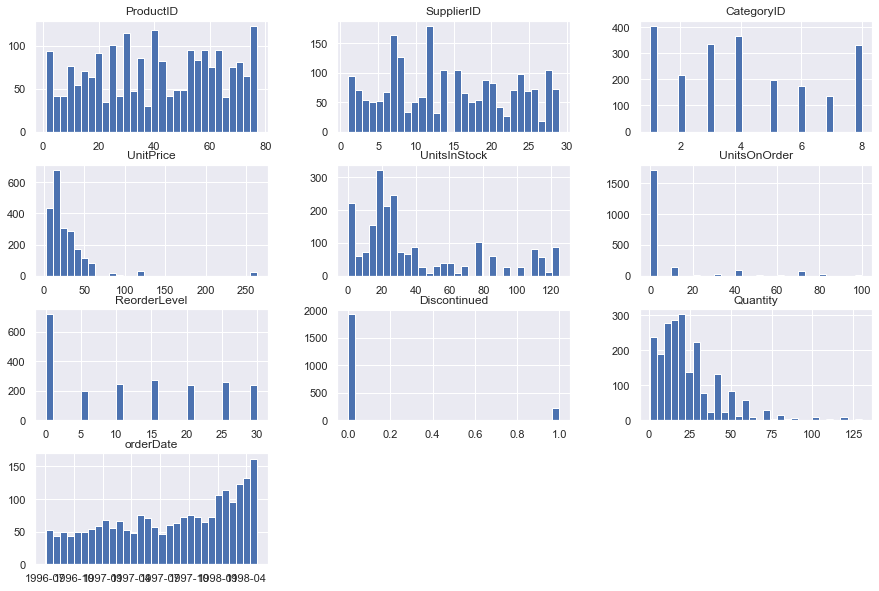

In [58]:
custTab.hist(bins=30, figsize=(15, 10)) #checking visually through histogram 
#most histogram are skewed; not normally distributed

Support assumptions by using shapiro test on unit price.
Where:
- H0: Data is normally distributed
- Ha: Data is not normally distributed

In [59]:
from scipy.stats import shapiro

norm, pval = shapiro(custTab['UnitPrice'])

if pval < 0.05 :
    print (f'Result of p-value is ({pval} < 5%)')
    print ('Data is not normally distributed')
else :
    print (f'Result of p-value is ({pval} > 5%)')
    print ('Data is normally distributed')

Result of p-value is (0.0 < 5%)
Data is not normally distributed


### **Hypothesis testing** 

From previous testing, data is shown to be not normally distributed. Therefore, non-parametric means of statistic test will be required. The chosen category to test is Meat/Poultry and Seafood as they are both protein sources, which are important aspect in a person's daily consumption. 

The two hypotheses are given to this data analysis project, where: 	
- H0: the mean of category Meat/Poultry’s unit price is equal to the mean of category Seafood’s unit price
- Ha: the mean of category Meat/Poultry’s unit price is not equal and/or greater or less than category Seafood’s unit price

Mann Whitney test will be done for these hypothesese as it seemed the most fit for non-parametric two independent population test. 


In [60]:
from scipy.stats import mannwhitneyu

hRes = list(mannwhitneyu(custTab[custTab['CategoryName'] == 'Meat/Poultry']['UnitPrice'],
            custTab[custTab['CategoryName'] == 'Seafood']['UnitPrice'], alternative = 'greater'))

print('U-statistics:', hRes[0])
print('P-Value:', hRes[1])

if hRes[1] < 0.05 :
    print (f'Result of p-value is ({hRes[1]} < 5%)')
    print ('H0 is rejected, there is a difference between the mean of category Meat/Poultry and category Seafood.')
else :
    print (f'Result of p-value is ({hRes[1]} > 5%)')
    print ('H0 is accepted, there is no difference between the mean of category Meat/Poultry and category Seafood.')

U-statistics: 41607.0
P-Value: 1.403704818826424e-17
Result of p-value is (1.403704818826424e-17 < 5%)
H0 is rejected, there is a difference between the mean of category Meat/Poultry and category Seafood.


**Correlation between the product's reorder level and the discontinuation of the product**

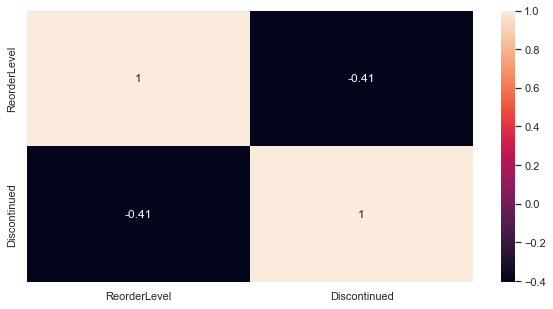

In [61]:
reAndDisCor = custTab[['ReorderLevel', 'Discontinued']].corr(method= 'spearman')
plt.figure(figsize=(10,5))
sns.heatmap(reAndDisCor, annot=True)
plt.show() #highly unrelated, product reorder level does not affect the discontinuation of a product